# Deep Learning Assignment  
**Name:** **Abhishek Tiwari**  
**Roll Number:** **23EJDAI002**   
**GitHub Repository : https://github.com/abhishektiwari4167/Deep-learning**    

This notebook performs:

1. Digit Classification using MNIST dataset  
2. Fashion Item Classification using Fashion-MNIST  

A simple but effective Neural Network is designed and evaluated using:
- Accuracy Plot  
- Loss Plot  
- Confusion Matrix  
- Classification Report  


### Import Required Libraries

We import TensorFlow/Keras for building neural networks,  
Matplotlib for visualization,  
and Sklearn for evaluation metrics.


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist, fashion_mnist

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

/Users/abhishektiwari/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Loading MNIST Dataset

MNIST contains 70,000 grayscale images of digits (0–9) of size 28x28.
We normalize pixel values to range 0–1 for better training.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


### Neural Network Architecture

- Flatten layer to convert 28x28 image into vector  
- Two Dense layers with ReLU  
- Dropout to avoid overfitting  
- Softmax output for 10 classes  


In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model


In [6]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8545 - loss: 0.4743 - val_accuracy: 0.9630 - val_loss: 0.1199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.9574 - loss: 0.1386 - val_accuracy: 0.9682 - val_loss: 0.1015
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.9671 - loss: 0.1041 - val_accuracy: 0.9729 - val_loss: 0.0914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9735 - loss: 0.0839 - val_accuracy: 0.9740 - val_loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.9768 - loss: 0.0725 - val_accuracy: 0.9777 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.9799 - loss: 0.0623 - val_accuracy: 0.9779 - val_loss: 0.0791
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - accuracy: 0.9810 - loss: 0.0584 - val_accuracy: 0.9790 - val_loss: 0.0755
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.9814 -

### Accuracy Plot


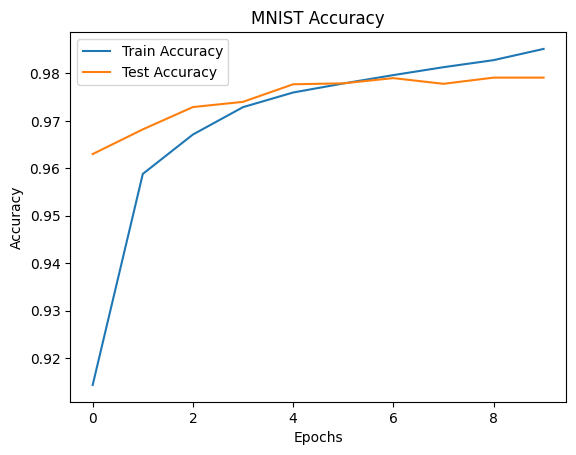

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("MNIST Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Loss Plot


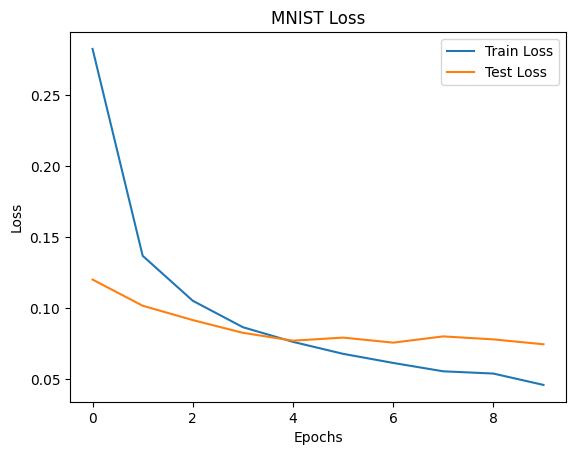

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("MNIST Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Confusion Matrix & Classification Report


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
Classification Report - MNIST
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



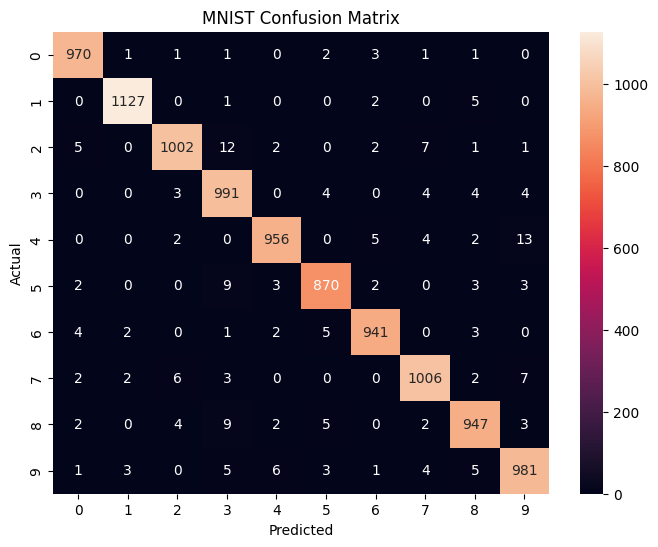

In [11]:
y_pred = np.argmax(model.predict(x_test), axis=1)

print("Classification Report - MNIST")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("MNIST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Fashion MNIST Dataset

Contains 10 classes:
T-shirt, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Boot


In [12]:
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

x_train_f = x_train_f / 255.0
x_test_f = x_test_f / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Model Architecture for Fashion MNIST
Same structure is used for fair comparison.


In [13]:
fashion_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

fashion_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Users/abhishektiwari/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training Fashion Model


In [14]:
history_f = fashion_model.fit(
    x_train_f, y_train_f,
    validation_data=(x_test_f, y_test_f),
    epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.7513 - loss: 0.6994 - val_accuracy: 0.8463 - val_loss: 0.4260
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.8493 - loss: 0.4141 - val_accuracy: 0.8541 - val_loss: 0.3909
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.8646 - loss: 0.3670 - val_accuracy: 0.8681 - val_loss: 0.3727
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.8699 - loss: 0.3533 - val_accuracy: 0.8714 - val_loss: 0.3682
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8737 - loss: 0.3380 - val_accuracy: 0.8724 - val_loss: 0.3556
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.8789 - loss: 0.3276 - val_accuracy: 0.8747 - val_loss: 0.3516
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8839 - loss: 0.3118 - val_accuracy: 0.8762 - val_loss: 0.3448
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.8882 -

### Accuracy Plot – Fashion MNIST


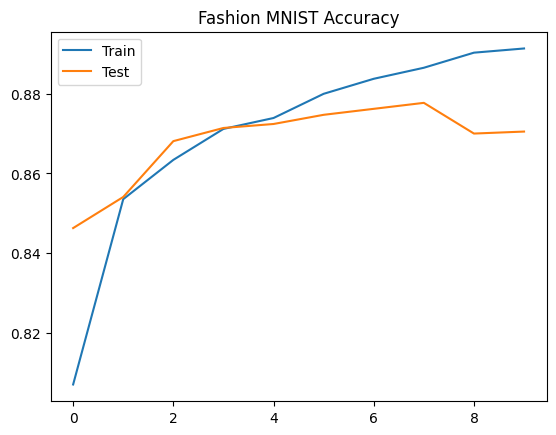

In [15]:
plt.plot(history_f.history['accuracy'], label='Train')
plt.plot(history_f.history['val_accuracy'], label='Test')
plt.title("Fashion MNIST Accuracy")
plt.legend()
plt.show()

### Loss Plot – Fashion MNIST


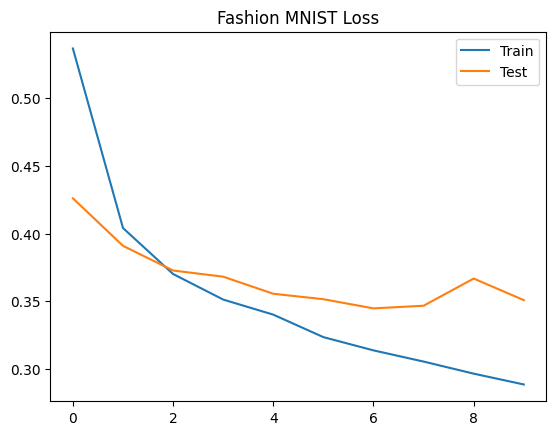

In [16]:
plt.plot(history_f.history['loss'], label='Train')
plt.plot(history_f.history['val_loss'], label='Test')
plt.title("Fashion MNIST Loss")
plt.legend()
plt.show()

### Confusion Matrix & Report – Fashion MNIST

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
Classification Report - Fashion MNIST
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.72      0.84      0.77      1000
           3       0.82      0.94      0.87      1000
           4       0.84      0.65      0.73      1000
           5       0.97      0.97      0.97      1000
           6       0.66      0.72      0.69      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



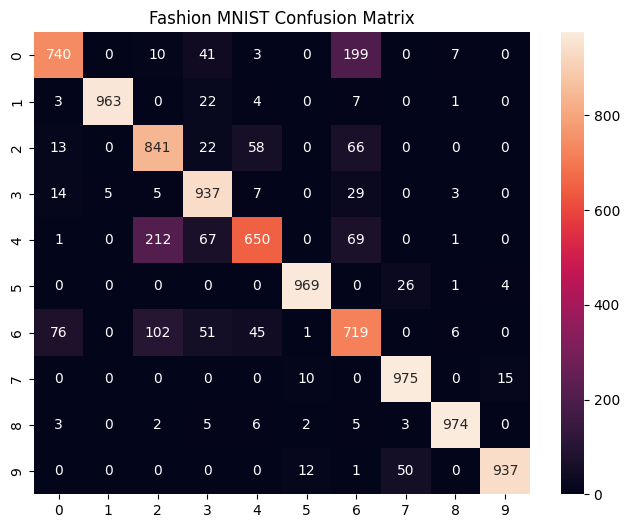

In [17]:
y_pred_f = np.argmax(fashion_model.predict(x_test_f), axis=1)

print("Classification Report - Fashion MNIST")
print(classification_report(y_test_f, y_pred_f))

cm_f = confusion_matrix(y_test_f, y_pred_f)

plt.figure(figsize=(8,6))
sns.heatmap(cm_f, annot=True, fmt='d')
plt.title("Fashion MNIST Confusion Matrix")
plt.show()

## Conclusion

- Built Neural Network for MNIST and Fashion MNIST  
- Evaluated using:
  - Accuracy & Loss Plots  
  - Confusion Matrix  
  - Classification Report  

Model performs well on MNIST and reasonably on Fashion-MNIST which is more complex.
